# Heart Failure Prediction using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv(r"C:\Users\Akanksha\Downloads\Heart disease end to end\heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [4]:
data.shape

(299, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.duplicated().any()

False

In [7]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
print(data.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


<AxesSubplot:title={'center':'Heart failure cases over time'}, xlabel='Time'>

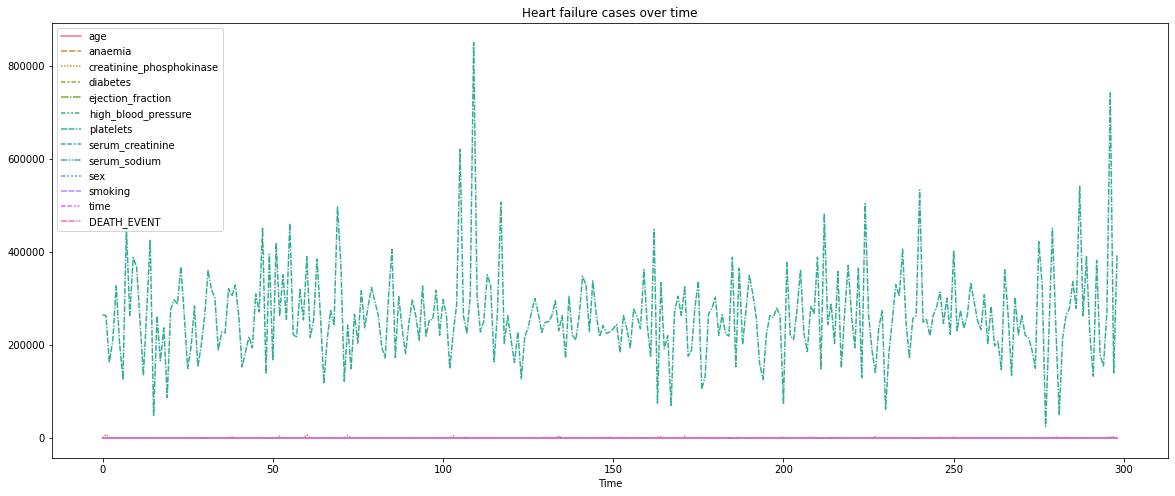

In [9]:
#visualizing how heart failure evolved with time
import seaborn as sns
plt.figure(figsize=(20,8))
plt.xlabel("Time")
plt.title("Heart failure cases over time")
sns.lineplot(data=data)

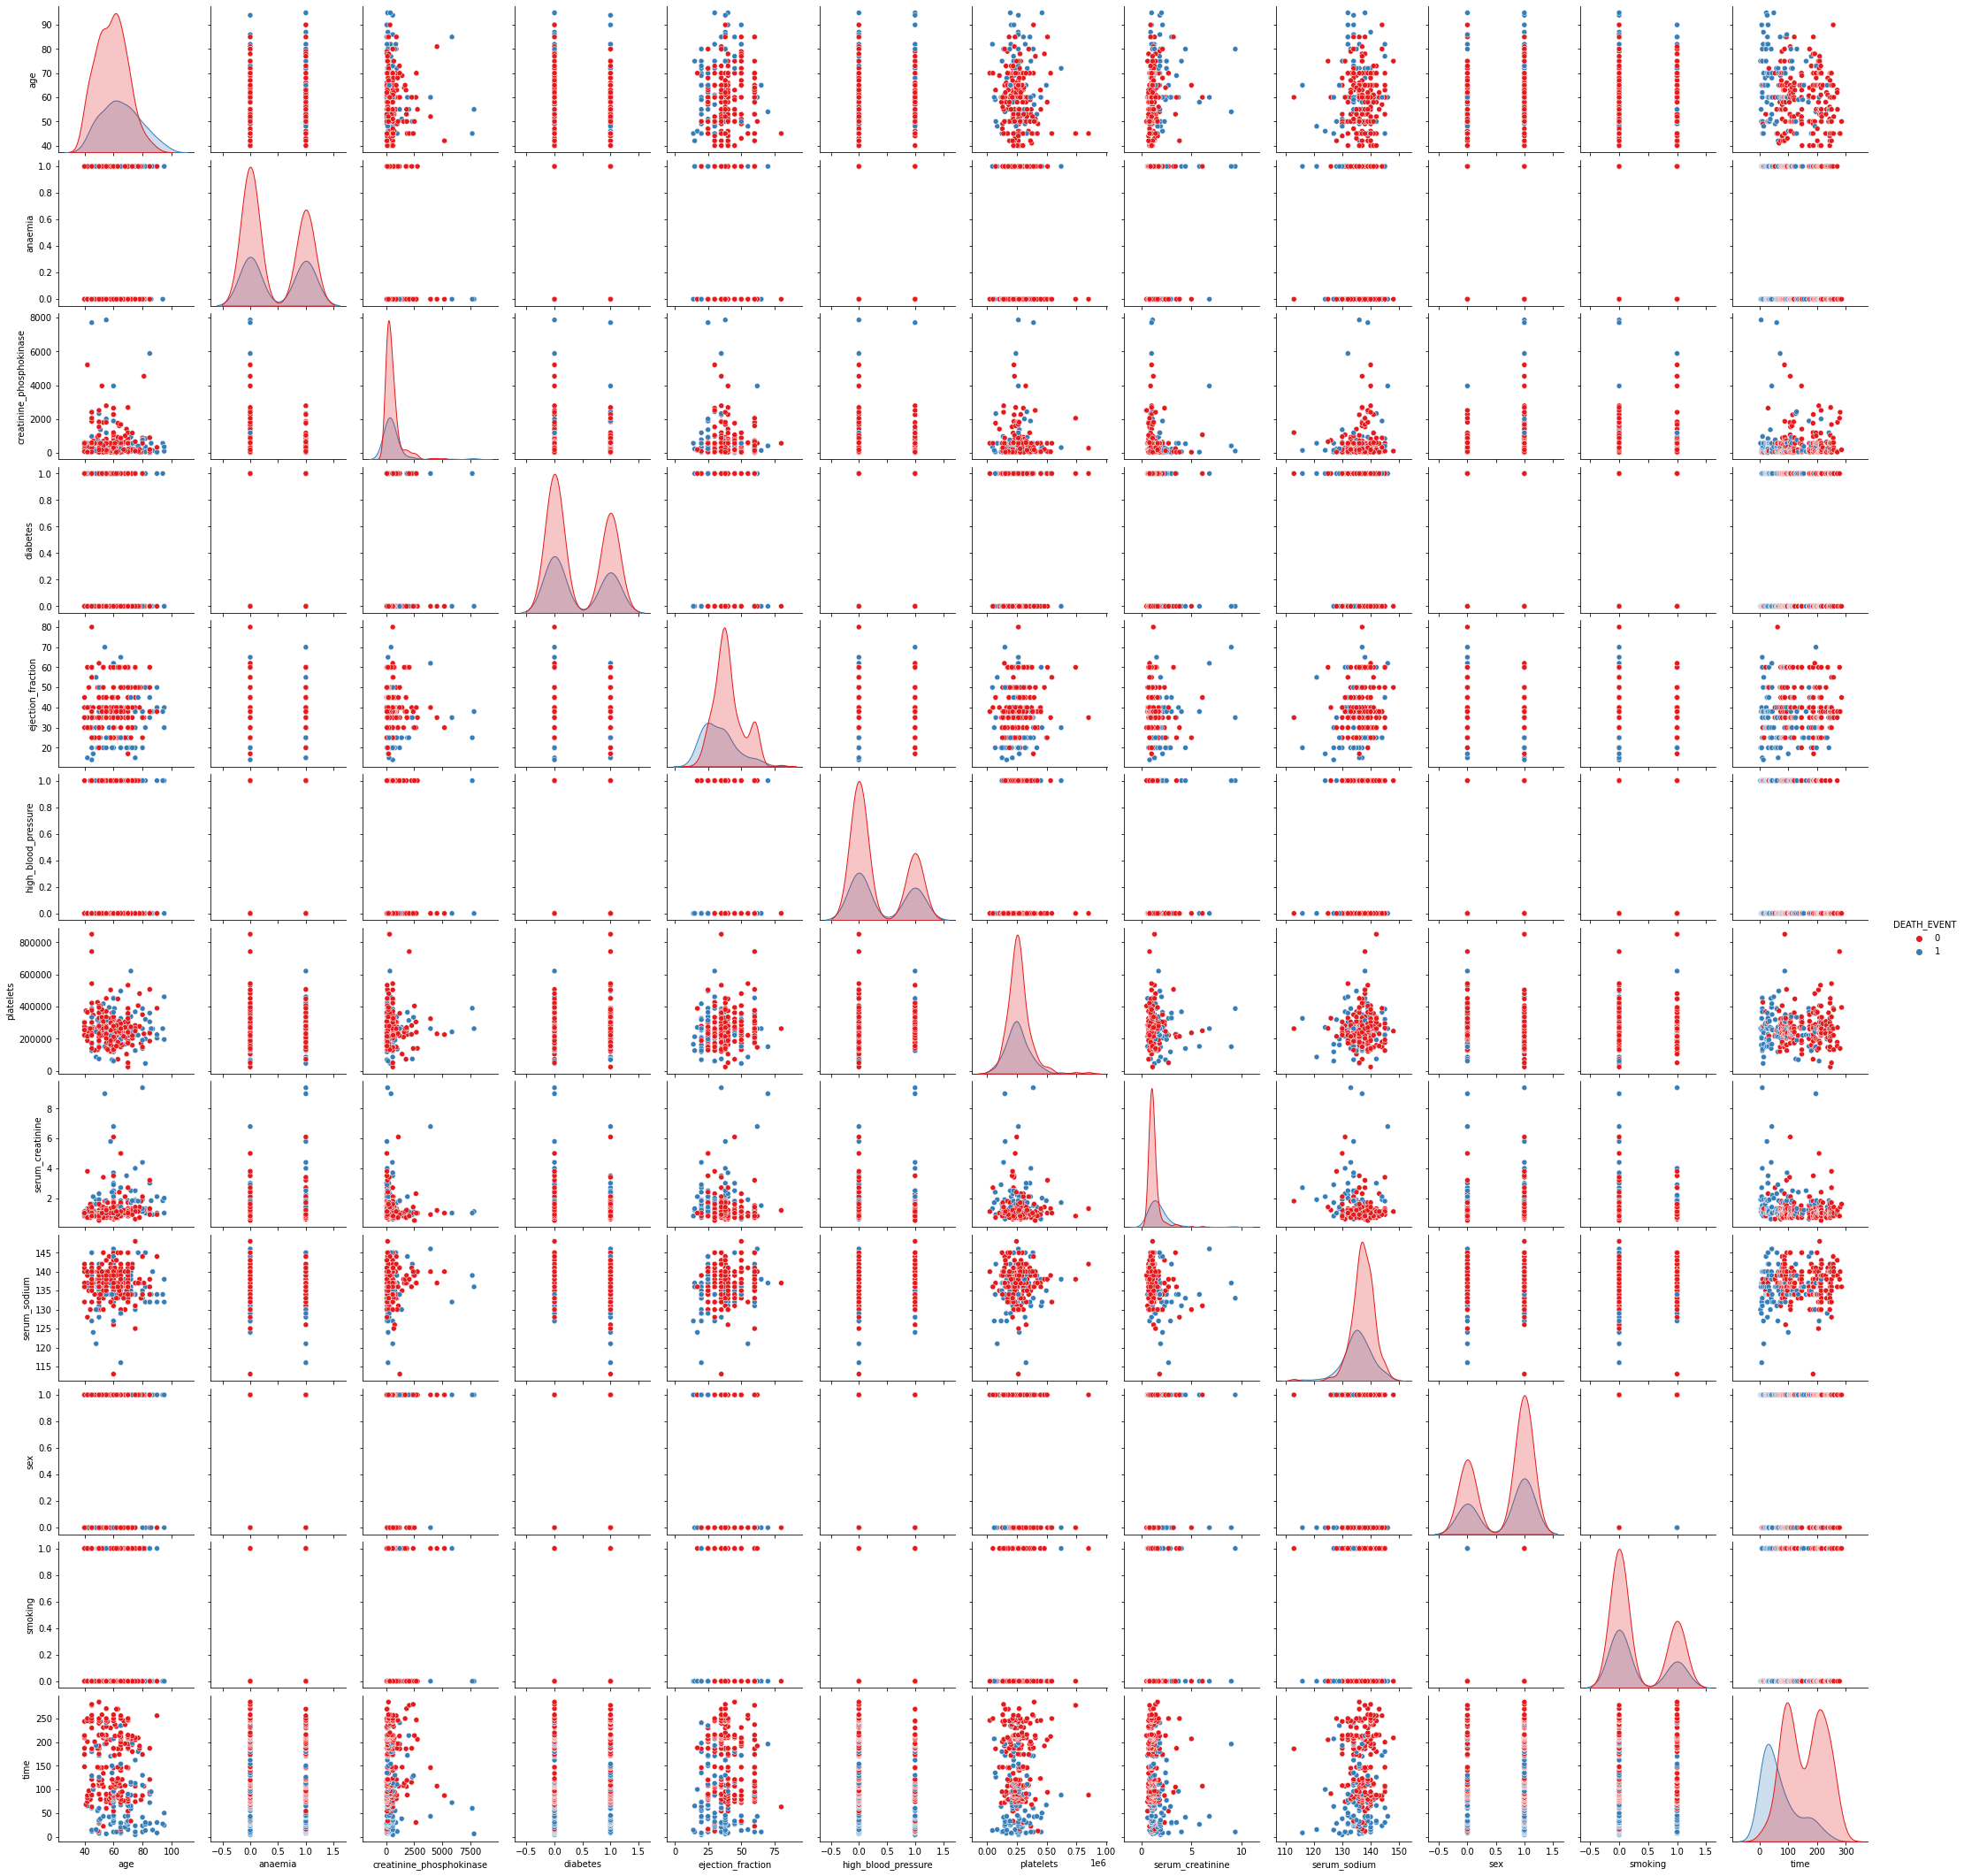

In [10]:
sns.pairplot(data,hue='DEATH_EVENT',palette='Set1')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

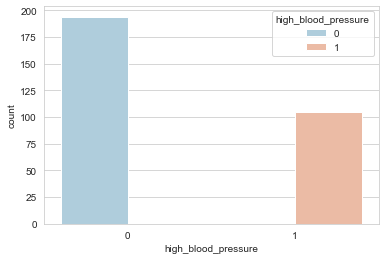

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='high_blood_pressure' , data=data ,hue='high_blood_pressure', palette='RdBu_r')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

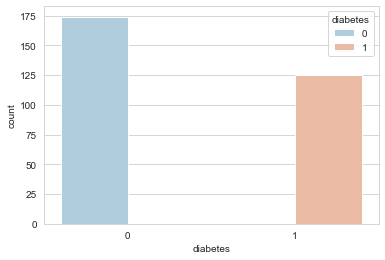

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='diabetes' , data=data ,hue='diabetes', palette='RdBu_r')

C:\MinGW\python 37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='platelets'>

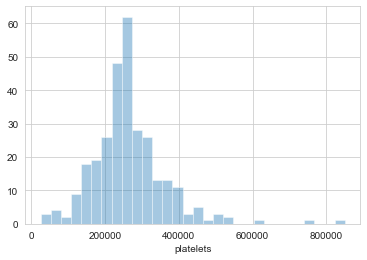

In [13]:
sns.distplot(data['platelets'].dropna(),kde=False,bins=30)

<AxesSubplot:>

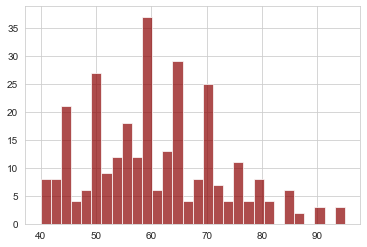

In [14]:
data['age'].hist(bins=30,color='darkred',alpha=0.7)

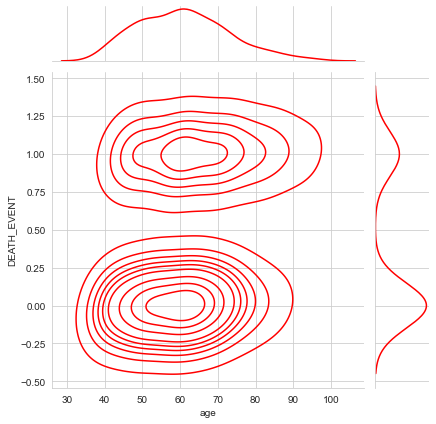

In [15]:
sns.jointplot(x='age',y='DEATH_EVENT',data=data,color='red',kind='kde');

In [16]:
# Now, splitting the column datatypes into two categories so that 
# analysis and model training becomes easy

categorical_var = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_var = data[["age" , "creatinine_phosphokinase" , "ejection_fraction" , "platelets","serum_creatinine","serum_sodium","time"]]

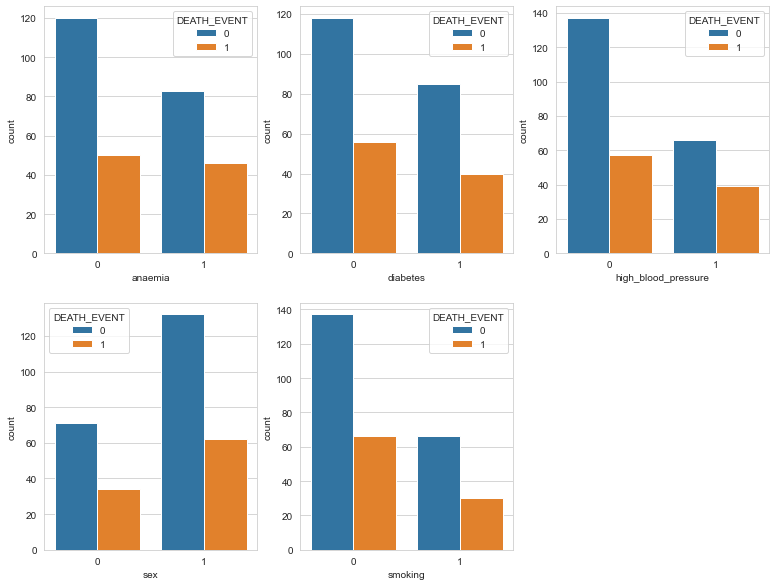

In [17]:
# Plotting the impact of categorical variables on DEATH_EVENT

plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_var):
    plt.subplot(2,3,i+1)
    sns.countplot(data = data, x= cat, hue = "DEATH_EVENT")
plt.show()

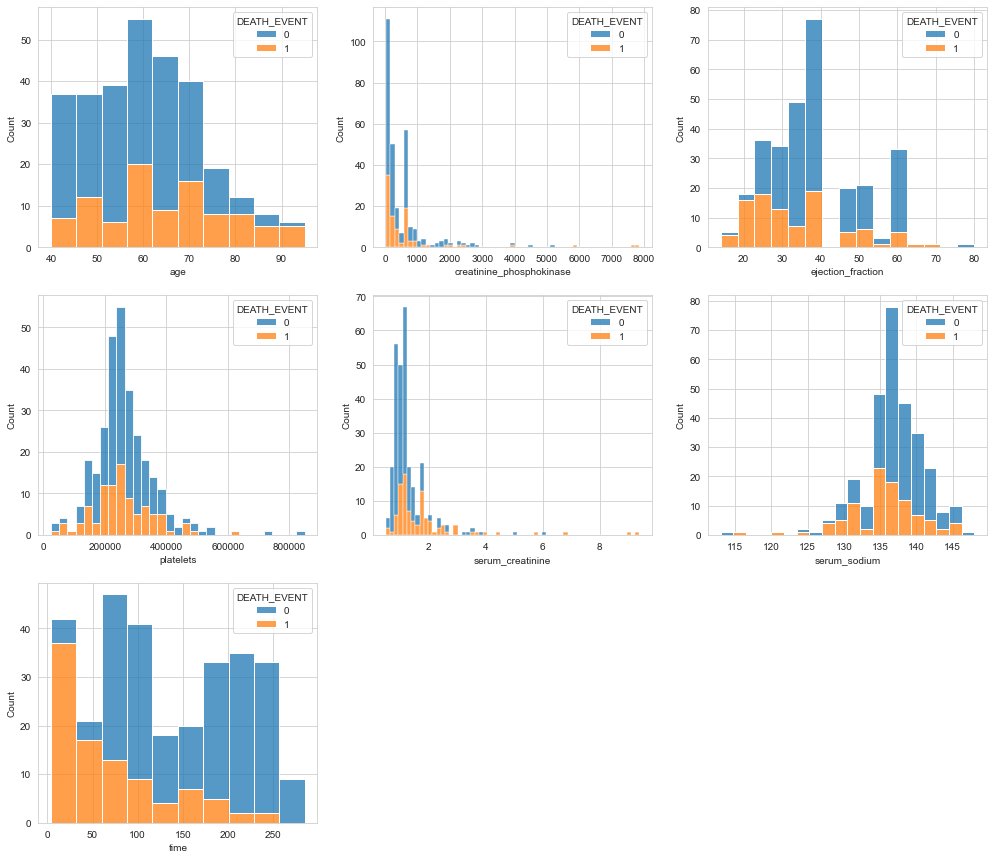

In [18]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_var):
    plt.subplot(3,3,j+1)
    sns.histplot(data = data, x= con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

# UNDERSTANDING FOR CATEGORICAL DATA - 


<!-- Anaemia:
 1 -> Person does not have anaemia
 0 -> Person has anaemia
 
 
Diabetes:
 1 -> Person does not have diabetes
 0 -> Person has diabetes
 
 
high_blood_pressure:
 1 -> Person does not have high_blood_pressure
 0 -> Person has high_blood_pressure
 
 
Smoking:
 1 -> Person does not have smoking
 0 -> Person has smoking
 
Sex:
 1 -> Person is male
 0 -> Person is female
 
DEATH_EVENT:
  1 -> HEart failure is the cause of death
  0 -> heart failure is not the cause of death -->
 

In [19]:
# Anaemia:
#  1 -> Person does not have anaemia
#  0 -> Person has anaemia
 
 
# Diabetes:
#  1 -> Person does not have diabetes
#  0 -> Person has diabetes
 
 
# high_blood_pressure:
#  1 -> Person does not have high_blood_pressure
#  0 -> Person has high_blood_pressure
 
 
# Smoking:
#  1 -> Person does not have smoking
#  0 -> Person has smoking
 
# Sex:
#  1 -> Person is male
#  0 -> Person is female
 
# DEATH_EVENT:
#   1 -> HEart failure is the cause of death
#   0 -> heart failure is not the cause of death -->
 

In [20]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [21]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [22]:
categorical_var.describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking
count,299.000000,299.000000,299.000000,299.000000,299.00000
mean,0.431438,0.418060,0.351171,0.648829,0.32107
std,0.496107,0.494067,0.478136,0.478136,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,1.000000,0.00000
75%,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000


In [23]:
continuous_var.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [24]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [25]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [26]:
# this shows that 
# people who died due to heart failure -> 96
# people who did not die due to heart disease -> 203

# this means our dataset is UNBALANCED

In [27]:
#Visualizing unbalanced dataset using scatter plot

age = data[["age"]]
platelets = data[["platelets"]]

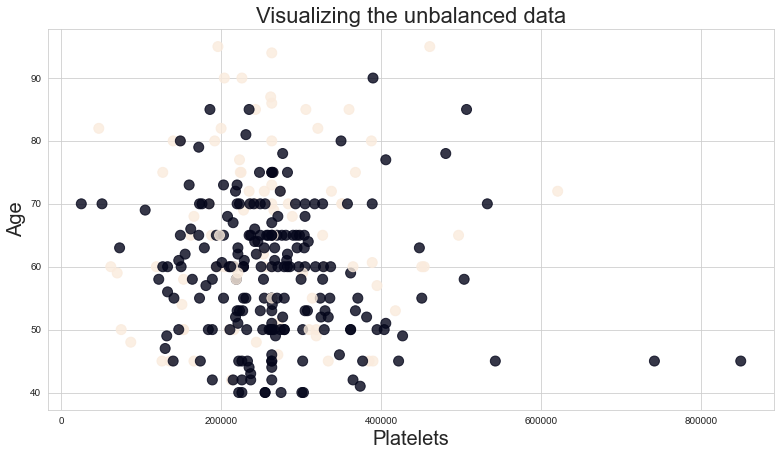

In [28]:
plt.figure(figsize=(13,7))
plt.scatter(platelets, age, c = data["DEATH_EVENT"], s=100 , alpha=0.8)
plt.xlabel("Platelets", fontsize = 20)
plt.ylabel("Age" , fontsize = 20)
plt.title("Visualizing the unbalanced data", fontsize=22)
plt.show()

### Plotting relationship between all the variables and DEATH EVENT

In [29]:
data.corr()

# values closer to 1 -> correlated
# values closer to 0 -> not correlated
# values closer to -1 ->negatively correlated

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


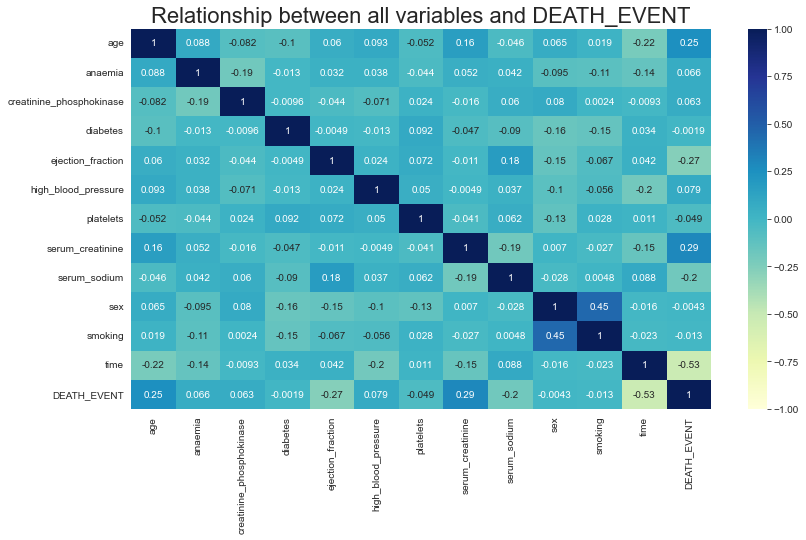

In [30]:
plt.figure(figsize=(13,7))
sns.heatmap(data.corr() , vmin=-1 , vmax=1 , cmap='YlGnBu' , annot=True)
plt.title("Relationship between all variables and DEATH_EVENT", fontsize=22)
plt.show()

In [31]:
# Insights from the heatmap above,

# Positive correlation between:
#     DEATH_EVENT
#     serum creatinine
#     age
    
# Negative correlation between:
#     DEATH_EVENT
#     time
#     ejection fraction
#     serum sodium

# LOGISTIC REGRESSION


In [32]:
from sklearn.model_selection import train_test_split
x = data.drop('DEATH_EVENT',axis=1)
y = data['DEATH_EVENT']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.30 , random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(x_train , y_train)

LogisticRegression()

In [34]:
prediction = regression.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , prediction)

0.8444444444444444

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        62
           1       0.82      0.64      0.72        28

    accuracy                           0.84        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.84      0.84      0.84        90



# KNN MODEL

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('DEATH_EVENT',axis=1))

StandardScaler()

In [38]:
scaled_features = scaler.transform(data.drop('DEATH_EVENT',axis=1))

In [39]:
data_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['DEATH_EVENT'],
                                                    test_size=0.30)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
pred = knn.predict(X_test)

In [44]:
# Prediction & evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[41 11]
 [21 17]]


In [45]:
accuracy_score(y_test , pred)

0.6444444444444445

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72        52
           1       0.61      0.45      0.52        38

    accuracy                           0.64        90
   macro avg       0.63      0.62      0.62        90
weighted avg       0.64      0.64      0.63        90



In [47]:
# Choosing k value
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

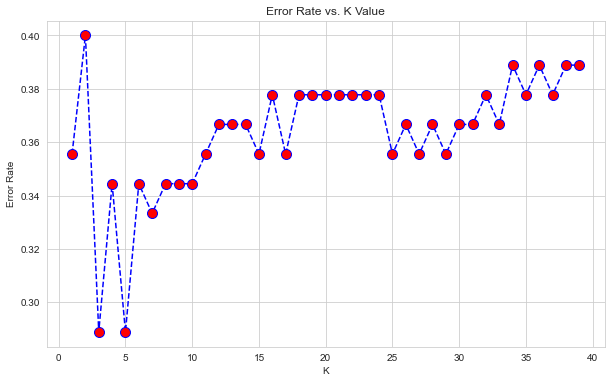

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [49]:
# K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[41 11]
 [21 17]]


              precision    recall  f1-score   support

           0       0.66      0.79      0.72        52
           1       0.61      0.45      0.52        38

    accuracy                           0.64        90
   macro avg       0.63      0.62      0.62        90
weighted avg       0.64      0.64      0.63        90



In [50]:
# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[52  0]
 [32  6]]


              precision    recall  f1-score   support

           0       0.62      1.00      0.76        52
           1       1.00      0.16      0.27        38

    accuracy                           0.64        90
   macro avg       0.81      0.58      0.52        90
weighted avg       0.78      0.64      0.56        90



In [51]:
prediction = knn.predict(x_test)
accuracy_score(y_test , prediction)

C:\MinGW\python 37\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.5777777777777777

# SVM

In [52]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [53]:
predictions = model.predict(X_test)

In [54]:
print(confusion_matrix(y_test,predictions))

[[50  2]
 [19 19]]


In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.96      0.83        52
           1       0.90      0.50      0.64        38

    accuracy                           0.77        90
   macro avg       0.81      0.73      0.74        90
weighted avg       0.80      0.77      0.75        90



In [56]:
accuracy_score(y_test , predictions)

0.7666666666666667

# DECISION TREES 

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
predictions = dtree.predict(X_test)

In [59]:
print(confusion_matrix(y_test,predictions))

[[46  6]
 [11 27]]


In [60]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        52
           1       0.82      0.71      0.76        38

    accuracy                           0.81        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.81      0.81      0.81        90



In [61]:
accuracy_score(y_test , predictions)

0.8111111111111111

# RANDOM FOREST 

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[50  2]
 [12 26]]


In [64]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        52
           1       0.93      0.68      0.79        38

    accuracy                           0.84        90
   macro avg       0.87      0.82      0.83        90
weighted avg       0.86      0.84      0.84        90



In [65]:
accuracy_score(y_test , rfc_pred)

0.8444444444444444

# Accuracies- 

In [66]:
# Logistic Regression -> 84% 
# SVM -> 71%
# Desision Tree -> 71%
# Random Forest Classifier -> 82%

# Best Model for Heart disease prediction dataset -> Logistic Regression